# <span style="color : #c0392b">Introduction</span>


LendingClub Loan Default Analysis

The analysis is divided into following main parts:
1. Reading the Data 
2. Understanding the Data
3. Data cleaning (cleaning missing values, removing redundant columns etc.)
4. Preliminary Outlier Treatment Analysis
5. Variable Identification
6. Univariate Analysis
7. Segmented Univariate Analysis
8. Bi Variate Analysis
9. Derived Metrics
10. Results summary
11. Recommendations

# <span style="color : #c0392b">Reading the data</span>

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

loan = pd.read_csv("loan.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# <span style="color : #c0392b">Understanding the data</span>

In [2]:
# Shape of the data
loan.shape

(39717, 111)

In [3]:
# Understanding data by visually checking it
loan.head

<bound method NDFrame.head of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1

In [4]:
# Understanding data by Describing various parameters
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
# Looking at all the column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

<h2>Some of the important columns in the dataset are loan_amount, term, interest rate, grade, sub grade, annual income, purpose of the loan etc.</h2>

<h4>The **target variable**, which we want to compare across the independent variables, is loan status. The strategy is to figure out compare the average default rates across various independent variables and identify the  ones that affect default rate the most.</h4>


In [6]:
# Many coluns has NaN values. Let us check if any collumn has NaN values.
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
# Checking Non-Null count and Dtype
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# <span style="color : #c0392b">Data Cleaning</span>

Some columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.

In [8]:
# summarising number of missing values in each column
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [10]:
# Checking columns with missing values > 0
loan.isna().sum()[loan.isna().sum() > 0]

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

We can see that many columns have 100% missing values; some have 65%, 33% etc. So first, let's get rid of the columns having 100% missing values.

In [11]:
# removing the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [12]:
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 55)


In [13]:
# summarise number of missing values again
100*(loan.isnull().sum()/len(loan.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [14]:
# There are now 2 columns having approx 32 and 64% missing values - 
# description and months since last delinquent(refer data dictionary for more description)

# let's have a look at a few entries in the columns
loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


The column description contains the applicant's comments while applying for the loan. We can use some text analysis techniques to derive new features from this column (such as sentiment, number of positive/negative words etc.).

Secondly, months since the last delinquent represents the number of months passed since the person last fell into the 90 DPD(days past due) group. There is an important reason we shouldn't use this column in analysis. Since we will not have this data at the time of loan application (it gets generated three months after the loan has been approved), it cannot be used as a predictor of default at the time of loan approval. 

Thus let's drop the two columns.

In [15]:
# dropping the two columns
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [16]:
# summarise number of missing values again
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [17]:
# missing values in rows
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [18]:
# checking whether some rows have more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

The data looks clean by and large. Let's also check whether all columns are in the correct format.

In [19]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [20]:
# The column int_rate is character type, let's convert it to float
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan['loan_amnt'] = loan['loan_amnt'].apply(lambda x: pd.to_numeric(x))
loan['annual_inc'] = loan['annual_inc'].apply(lambda x: pd.to_numeric(x))


In [21]:
# checking the data types
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [22]:
# also, lets extract the numeric part from the variable employment length

# first, let's drop the missing values from the column (otherwise the regex code below throws error)
loan = loan[~loan['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [23]:
# looking at types of the columns again
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                      int64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [24]:
# drop all columns where all values are zero
loan=loan.loc[:, (loan != 0).any(axis=0)]
#drop all columns where all data are same
loan = loan[loan.columns[loan.nunique() > 1]]


In [25]:
print ("Rows     : " ,loan.shape[0])
print ("Columns  : " ,loan.shape[1])
print ("\nFeatures : \n" ,loan.columns.tolist())
print ("\nMissing values :  ", loan.isnull().sum().values.sum())
print ("\nUnique values :  \n",loan.nunique())

Rows     :  38642
Columns  :  44

Features : 
 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies']

Missing values :   2262

Unique values :  
 id                         38642
member_id                  38642
loan_amnt                    880
funded_amnt                 1038
funded_amnt_inv             8097
term                           2
int_rate                     371
installment              

In [26]:
# Five date columns are stored as object. Converting them to date.
loan['issue_d'] = pd.to_datetime( loan['issue_d'], format = '%b-%y' )
loan['earliest_cr_line'] = pd.to_datetime( loan['earliest_cr_line'], format = '%b-%y' )
loan['last_pymnt_d'] = pd.to_datetime( loan['last_pymnt_d'], format = '%b-%y' )
#loan['next_pymnt_d'] = pd.to_datetime( loan['next_pymnt_d'], format = '%b-%y' )
loan['last_credit_pull_d'] = pd.to_datetime( loan['last_credit_pull_d'], format = '%b-%y' )

In [27]:
# Two columns dtype = 'object' beacuse of % at the end. Lets convert them to integer.
# loan['int_rate'] = loan['int_rate'].apply(lambda x : pd.to_numeric(x[:-1]))
loan['revol_util'] = loan['revol_util'].apply(lambda x : pd.to_numeric(x[:-1]) if isinstance(x, str) else x)

loan.dtypes


id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                          int64
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
url                                object
purpose                            object
title                              object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                       

In [28]:
print ("Rows     : " ,loan.shape[0])
print ("Columns  : " ,loan.shape[1])
print ("\nFeatures : \n" ,loan.columns.tolist())
print ("\nMissing values :  ", loan.isnull().sum().values.sum())
print ("\nUnique values :  \n",loan.nunique())

Rows     :  38642
Columns  :  44

Features : 
 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies']

Missing values :   2262

Unique values :  
 id                         38642
member_id                  38642
loan_amnt                    880
funded_amnt                 1038
funded_amnt_inv             8097
term                           2
int_rate                     371
installment              

# <span style="color : #c0392b">Outlier Detection</span>

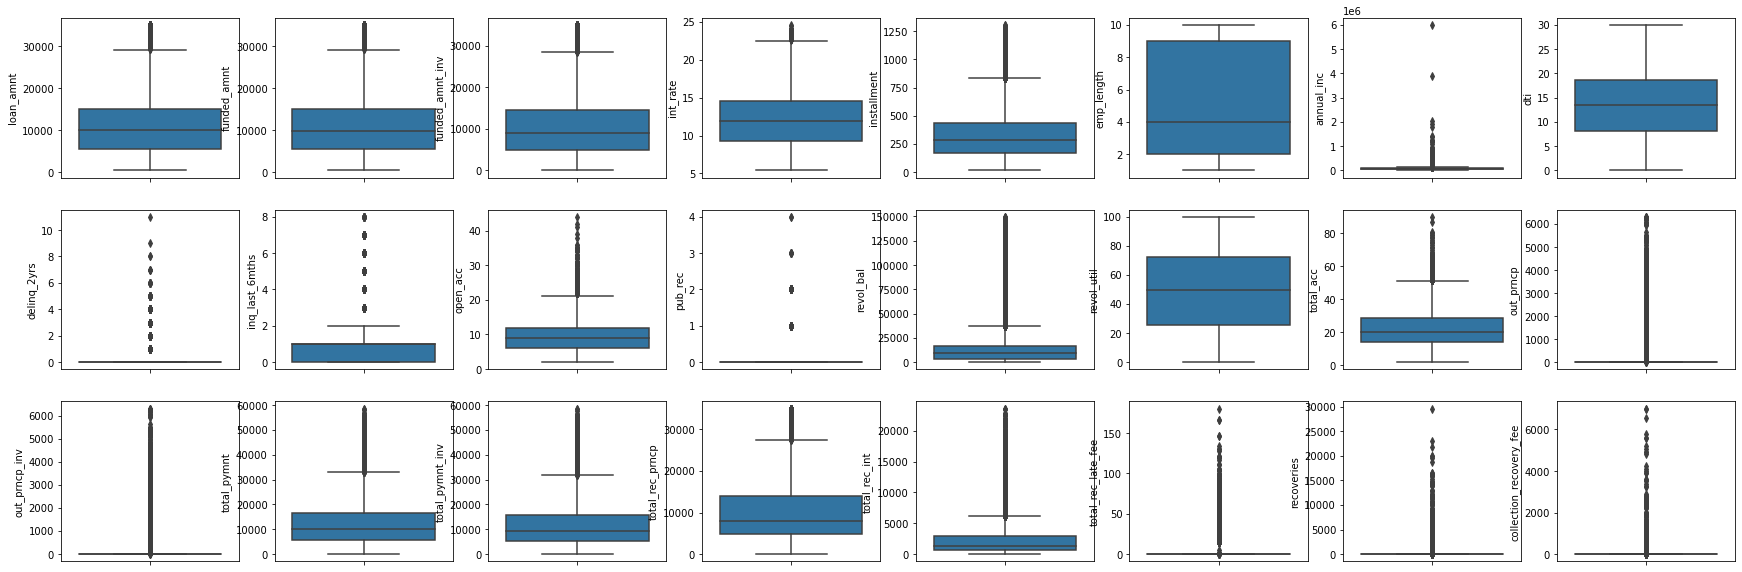

In [29]:
df_continuous = loan[loan.describe().columns]
df_continuous.drop(['id', 'member_id'], axis = 1, inplace = True)
df_continuous.shape



# Checking outliers in all continuous columns


count = 0
col_num = 1

plt.subplots(3, 9, figsize = (30, 10), sharex = False, sharey = False)
for i in range(3):
    for j in range(8):
        plt.subplot(3, 8, count + 1)
#         print(i, j, col_num)
        sns.boxplot(data = df_continuous, y = df_continuous.iloc[:, col_num - 1] ,orient = 'v')
        if col_num <= df_continuous.shape[1] :
            count += 1
            col_num += 1

plt.show()

### Insights
#### High number of outliers: 
amount_inc, delinq_2yrs, inq_last_6mnts, open_acc, pub_rec, revol_bal, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_amnt, pub_rec_bankruptcies

# <span style="color : #c0392b">Variable Identification</span>

In [30]:
# Checking the dtypes again
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38642 non-null  int64         
 1   member_id                38642 non-null  int64         
 2   loan_amnt                38642 non-null  int64         
 3   funded_amnt              38642 non-null  int64         
 4   funded_amnt_inv          38642 non-null  float64       
 5   term                     38642 non-null  object        
 6   int_rate                 38642 non-null  float64       
 7   installment              38642 non-null  float64       
 8   grade                    38642 non-null  object        
 9   sub_grade                38642 non-null  object        
 10  emp_title                37202 non-null  object        
 11  emp_length               38642 non-null  int64         
 12  home_ownership           38642 n

The goal is to identify predictors of default so that we can use those variables for approval/rejection of the loan at the time of loan application. 

Three types of variables - 
1. Those related to the applicant (demographic variables such as age, occupation, employment details etc.)
2. loan characteristics (loan amount, interest rate, the purpose of loan etc.) 
3. Customer behaviour variables (those generated after the loan was approved, such as delinquent two years, revolving balance, next payment date etc.).

Now, the customer behaviour parameters are not there at the time of loan approval, and thus they cannot be used as parameters for credit approval. 

Thus, as we advance, we will use only the other two types of variables.

In [31]:
behaviour_var =  [
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  ]


print(behaviour_var)

['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee']


In [32]:
# let's now remove the behaviour variables from analysis
df = loan.drop(behaviour_var, axis=1)

Typically, variables such as acc_now_delinquent, chargeoff within 12 months etc. (which are related to the applicant's past loans) are available from the credit bureau. 

In [33]:
# getting rid of other variables that aren't that useful, though zip can be plotted on a map and
# Region wise analysis can be done.

df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

Next, let's have a look at the target variable - loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.



In [34]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

We can see that fully paid comprises most of the loans. The ones marked 'current' are neither fully paid not defaulted, so let's get rid of the current loans. Also, let's tag the other two values as 0 or 1. 

In [35]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

# <span style="color : #c0392b">Univariate Analysis</span>


First, let's look at the overall default rate.

In [36]:
# default rate
round(np.mean(df['loan_status']), 2)

0.14

The overall default rate is about 14%.  

## <span style="color : #f39c12">Univariate analysis of categorical variables</span>

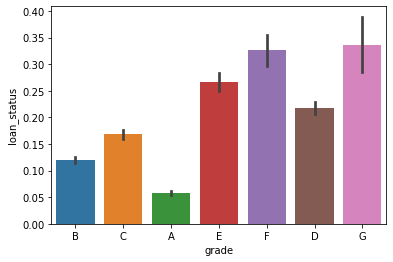

In [37]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

In [38]:
# lets define a function to plot loan_status across categorical variables
def case_study(variable):
    sns.barplot(x=variable, y='loan_status', data=df)
    plt.show()
    

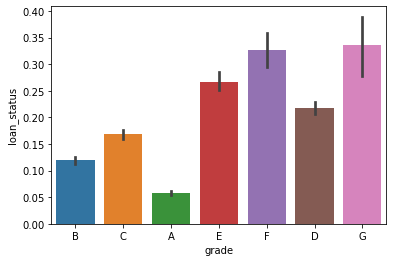

In [39]:
# compare default rates across grade of loan
case_study('grade')

Clearly, as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan. 

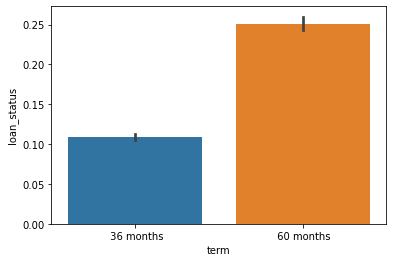

In [40]:
# term: 60 months loans default more than 36 months loans
case_study('term')

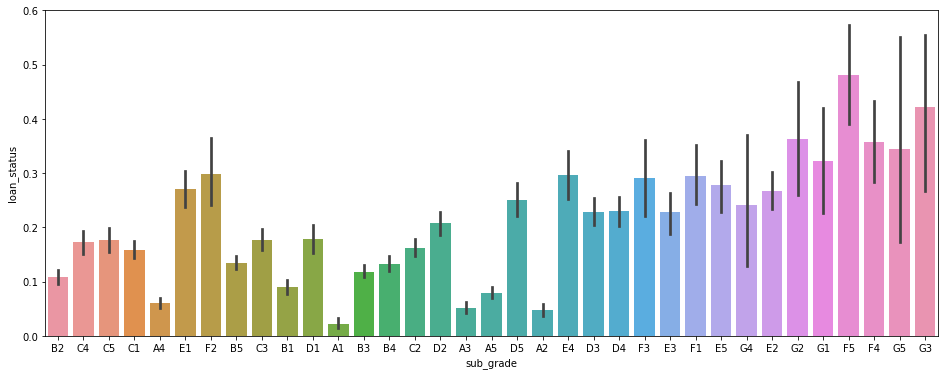

In [41]:
# sub-grade: as expected - A1 is better than A2 better than A3 and so on 
plt.figure(figsize=(16, 6))
case_study('sub_grade')

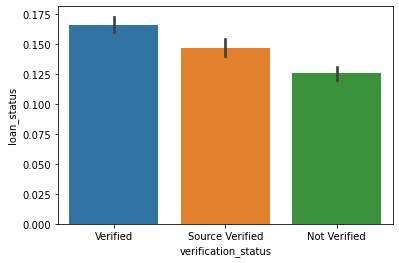

In [42]:
# verification_status: surprisingly, verified loans default more than not verified
case_study('verification_status')


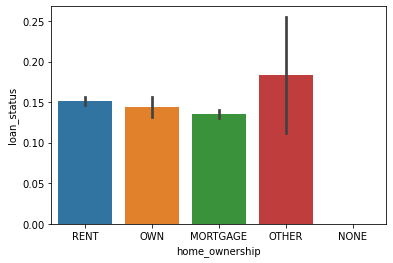

In [43]:
# home ownership: not a great discriminator
case_study('home_ownership')

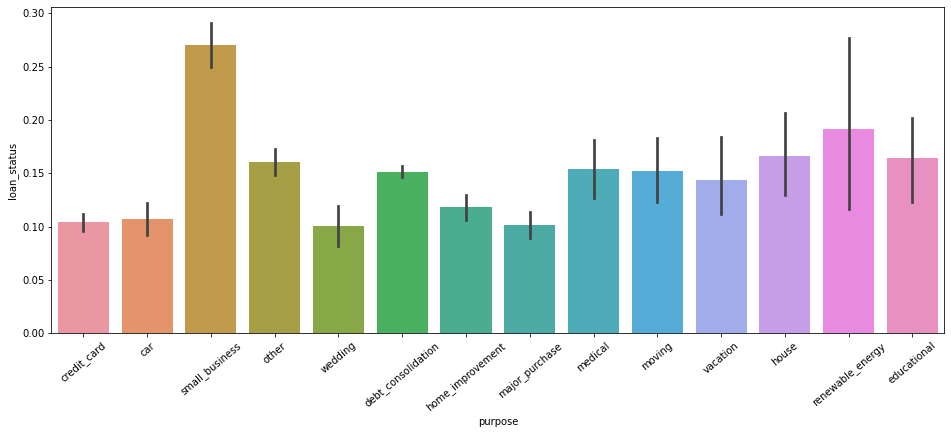

In [44]:
# purpose: small business loans default the most, then renewable energy and education
plt.figure(figsize=(16, 6))
# Rotating the labels on X-axis to avoid overlapping
plt.xticks(rotation=40) 
case_study('purpose')

In [45]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
df['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [46]:
# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

# let's first observe the number of loans granted across years
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

In [47]:
# number of loans across months
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

Most loans are granted in December, and in general in the latter half of the year.


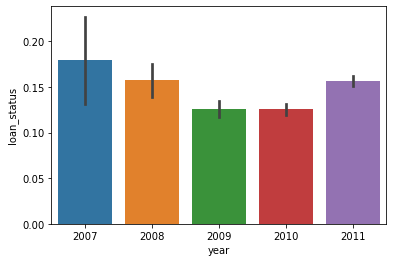

In [48]:
# lets compare the default rates across years
# the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010
case_study('year')

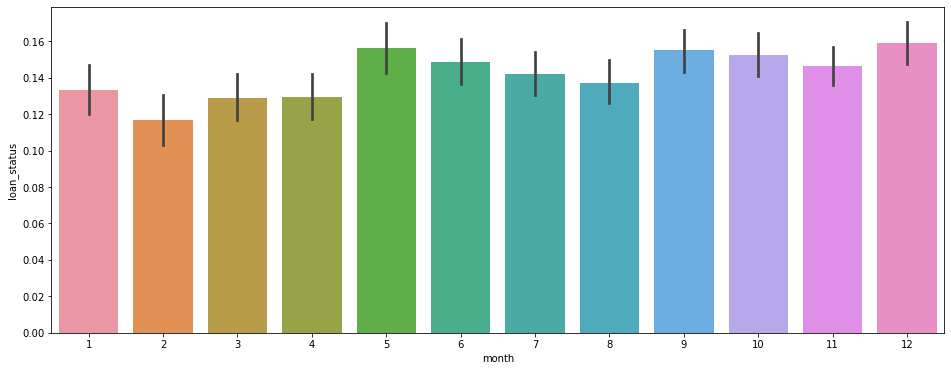

In [49]:
# comparing default rates across months: not much variation across months
plt.figure(figsize=(16, 6))
case_study('month')

In [50]:
# https://stackoverflow.com/questions/36107946/elegant-way-to-get-all-categorical-columns-in-pandas
df_categorical = [col for col in df.columns if df[col].dtype == "O"]

In [51]:
# Checking length of categorical columns
len(df_categorical)
# df_categorical

7

In [52]:
# Checking unique entries in categorical columns
for k in df_categorical:
    print(k, df[k].nunique(), round(df[k].nunique()*100/df.shape[0], 1))

term 2 0.0
grade 7 0.0
sub_grade 35 0.1
emp_title 27982 74.5
home_ownership 5 0.0
verification_status 3 0.0
purpose 14 0.0


## <span style="color : #f39c12">Univariate analysis of continuous variables</span>

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

Let's bin the loan amount variable into small, medium, high, very high.

In [53]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt_categorical'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [54]:
df['loan_amnt_categorical'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt_categorical, dtype: int64

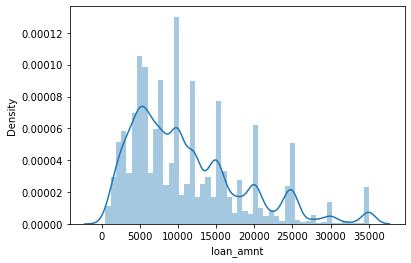

In [55]:
# loan amount: the median loan amount is around 10,000
sns.distplot(df['loan_amnt'])
plt.show()

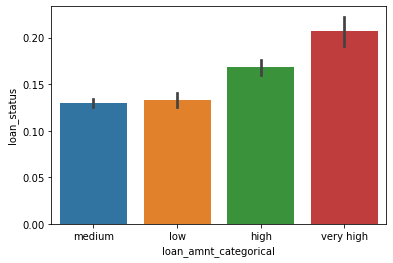

In [56]:
# let's compare the default rates across loan amount type
# higher the loan amount, higher the default rate
case_study('loan_amnt_categorical')

In [57]:
# let's also convert funded amount invested to bins
df['funded_amnt_inv_categorical'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

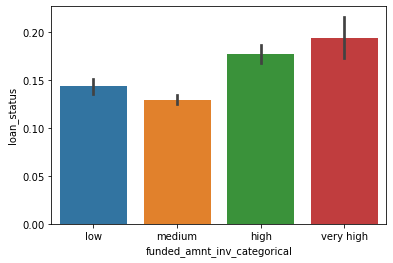

In [58]:
# funded amount invested
case_study('funded_amnt_inv_categorical')

In [59]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate_categorical'] = df['int_rate'].apply(lambda x: int_rate(x))

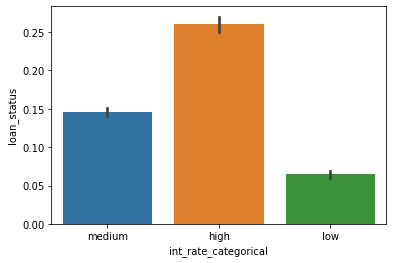

In [60]:
# comparing default rates across rates of interest
# high interest rates default more, as expected
case_study('int_rate_categorical')

In [61]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti_categorical'] = df['dti'].apply(lambda x: dti(x))
# Create derived variable 
df['dti_bin'] = pd.cut(df['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])


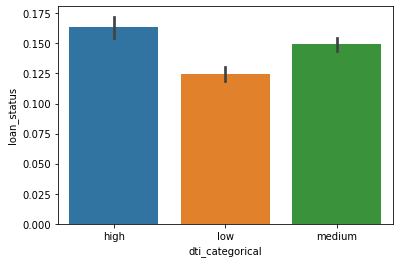

In [62]:
# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
case_study('dti_categorical')

In [63]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt_categorical'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

In [64]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment_categorical'] = df['installment'].apply(lambda x: installment(x))

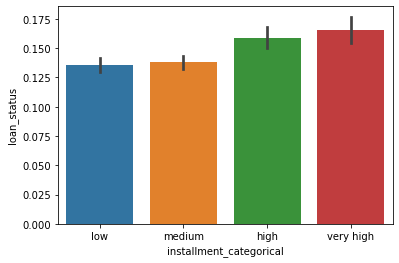

In [65]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
case_study('installment_categorical')

In [66]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc_categorical'] = df['annual_inc'].apply(lambda x: annual_income(x))

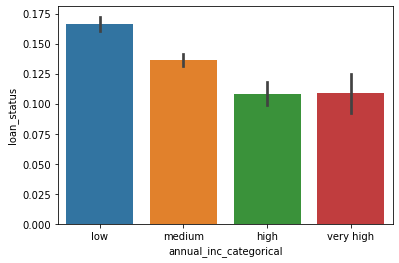

In [67]:
# annual income and default rate
# lower the annual income, higher the default rate
case_study('annual_inc_categorical')

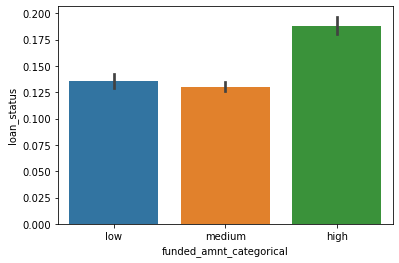

In [68]:
case_study('funded_amnt_categorical')


In [69]:
# employment length
# first, let's drop the missing value observations in emp length
df = df[~df['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df['emp_length_categorical'] = df['emp_length'].apply(lambda x: emp_length(x))

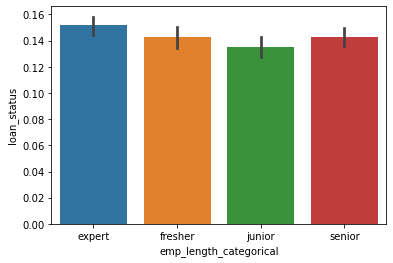

In [70]:
# emp_length and default rate
# not much of a predictor of default
case_study('emp_length_categorical')

In [71]:
pd.set_option('display.max_columns', df.shape[1])
round(df.describe(), 2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,pub_rec_bankruptcies,month,year
count,37544.00,37544.00,37544.00,37544.00,37544.00,37544.00,37544.00,37544.00,37544.00,37544.00,37544.00,37544.00,37544.00,37544.0,37544.00,37544.00,37497.00,37544.00,37544.00,36847.00,37544.00,37544.00
mean,674300.18,839486.41,11119.33,10853.56,10280.50,11.96,324.65,5.06,69407.08,0.14,13.28,0.15,0.87,9.3,0.05,13363.70,48.86,22.08,2769.44,0.04,7.11,2010.30
std,209846.40,265517.60,7354.10,7096.32,7034.12,3.68,208.90,3.40,64676.98,0.35,6.66,0.49,1.07,4.4,0.23,15894.97,28.34,11.42,4514.77,0.20,3.41,0.89
min,54734.00,70699.00,500.00,500.00,0.00,5.42,15.69,1.00,4000.00,0.00,0.00,0.00,0.00,2.0,0.00,0.00,0.00,2.00,0.00,0.00,1.00,2007.00
25%,509115.50,656490.75,5500.00,5400.00,5000.00,8.94,167.37,2.00,41000.00,0.00,8.16,0.00,0.00,6.0,0.00,3693.00,25.40,13.00,220.82,0.00,4.00,2010.00
50%,653465.50,835288.00,10000.00,9600.00,8850.00,11.83,280.00,4.00,60000.00,0.00,13.38,0.00,1.00,9.0,0.00,8840.50,49.30,20.00,578.54,0.00,7.00,2011.00
75%,826900.00,1034971.50,15000.00,15000.00,14075.00,14.42,428.94,9.00,83000.00,0.00,18.55,0.00,1.00,12.0,0.00,17009.00,72.40,29.00,3494.71,0.00,10.00,2011.00
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,24.40,1305.19,10.00,6000000.00,1.00,29.99,11.00,8.00,44.0,4.00,149588.00,99.90,90.00,36115.20,2.00,12.00,2011.00


In [72]:
# Checking Unique Values
for k in df.describe().columns:
    print(k, df[k].nunique(), round(df[k].nunique()*100/df.shape[0], 2))

id 37544 100.0
member_id 37544 100.0
loan_amnt 866 2.31
funded_amnt 1016 2.71
funded_amnt_inv 7945 21.16
int_rate 370 0.99
installment 14801 39.42
emp_length 10 0.03
annual_inc 5006 13.33
loan_status 2 0.01
dti 2848 7.59
delinq_2yrs 11 0.03
inq_last_6mths 9 0.02
open_acc 40 0.11
pub_rec 5 0.01
revol_bal 21000 55.93
revol_util 1086 2.89
total_acc 82 0.22
last_pymnt_amnt 33657 89.65
pub_rec_bankruptcies 3 0.01
month 12 0.03
year 5 0.01


# <span style="color : #c0392b">Segmented Univariate Analysis</span>

We have now compared the default rates across various variables, and some of the critical predictors are the purpose of the loan, interest rate, annual income, grade etc.

In the credit industry, one of the most critical factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt consolidation loans etc. 

Let's again look at the default rates across the purpose of the loan.

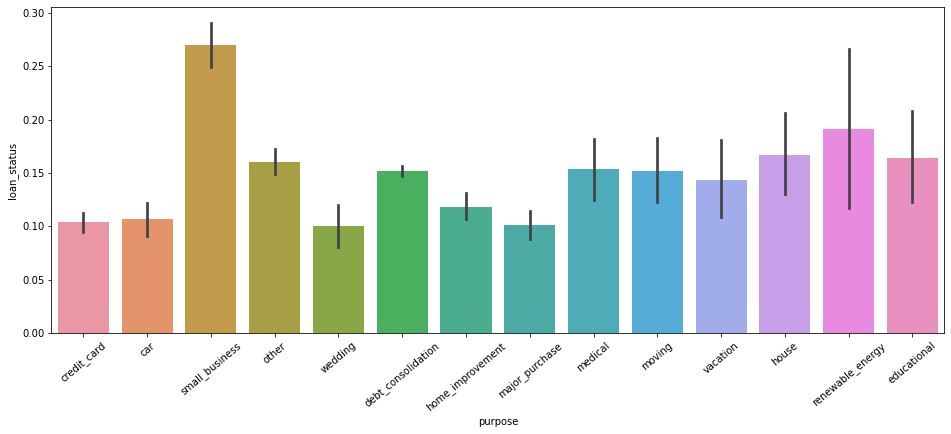

In [73]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(16, 6))
plt.xticks(rotation=40)
case_study('purpose')

In the upcoming analyses, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate. 

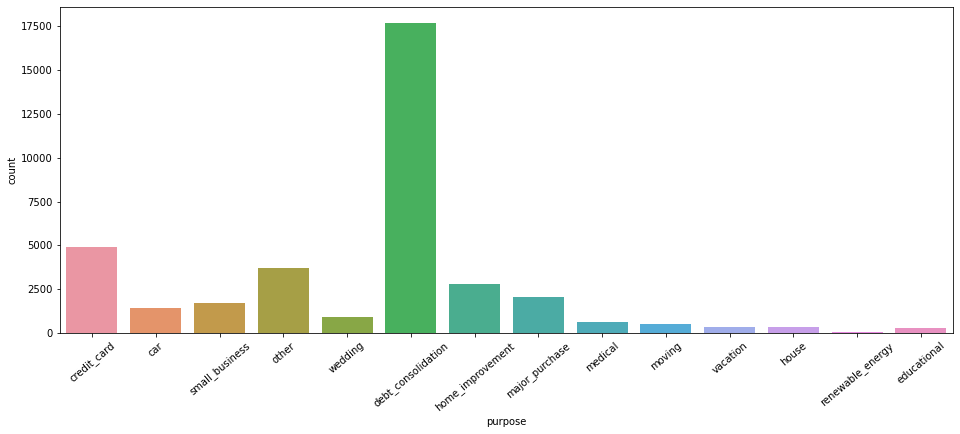

In [74]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 6))
plt.xticks(rotation=40)
sns.countplot(x='purpose', data=df)
plt.show()

Let's analyse the top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [75]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

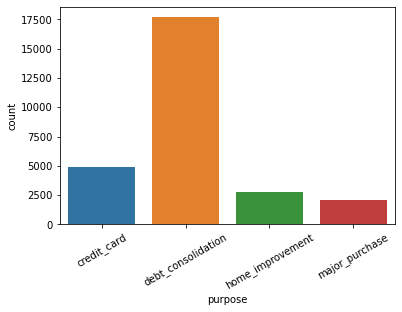

In [76]:
# plotting number of loans by purpose 
sns.countplot(x=df['purpose'])
plt.xticks(rotation=30)
plt.show()

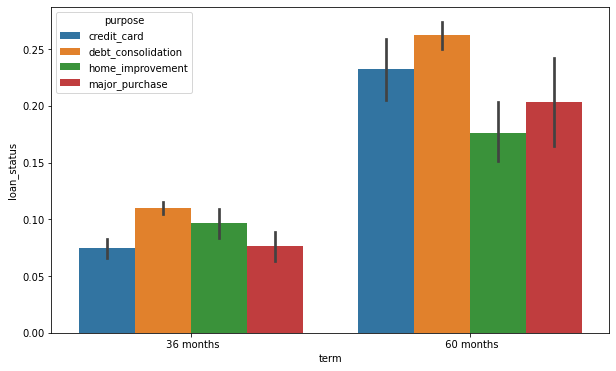

In [77]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

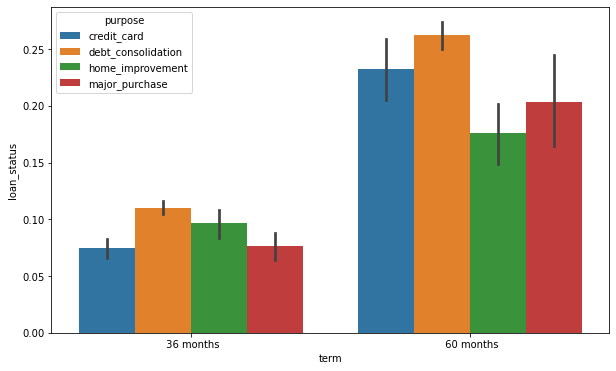

In [78]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

    
plot_segmented('term')

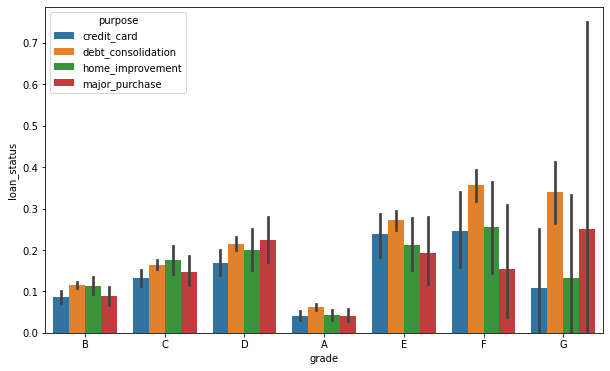

In [79]:
# grade of loan
plot_segmented('grade')

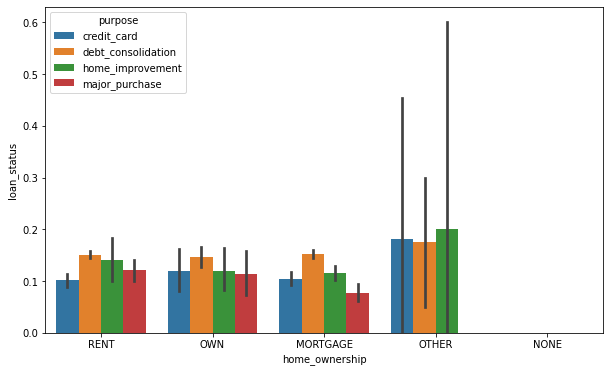

In [80]:
# home ownership
plot_segmented('home_ownership')

In general, debt consolidation loans have the highest default rates. Lets compare across other categories as well.

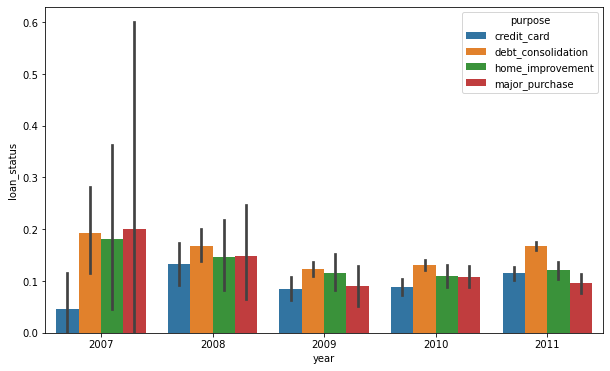

In [81]:
# year
plot_segmented('year')

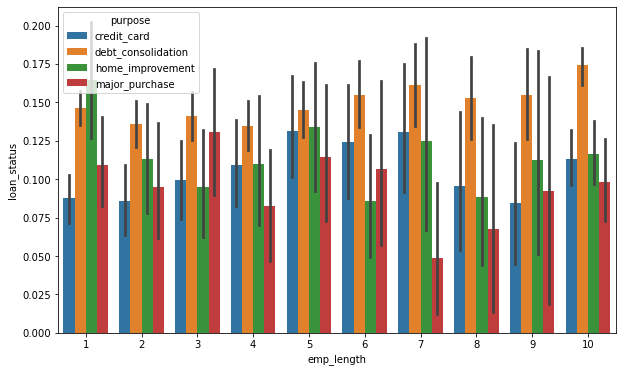

In [82]:
# emp_length
plot_segmented('emp_length')

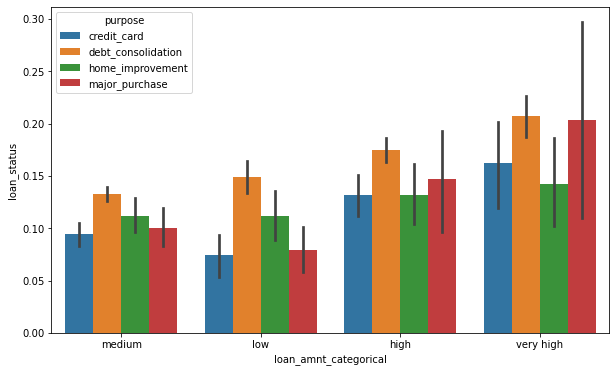

In [83]:
# loan_amnt: same trend across loan purposes
plot_segmented('loan_amnt_categorical')

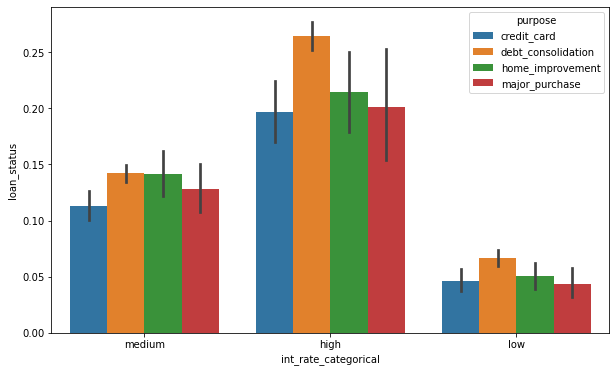

In [84]:
# interest rate
plot_segmented('int_rate_categorical')

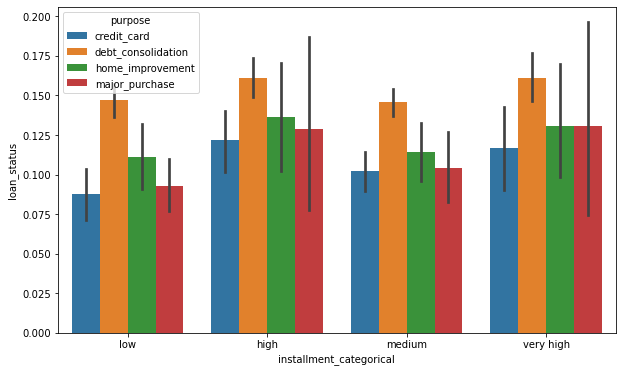

In [85]:
# installment
plot_segmented('installment_categorical')

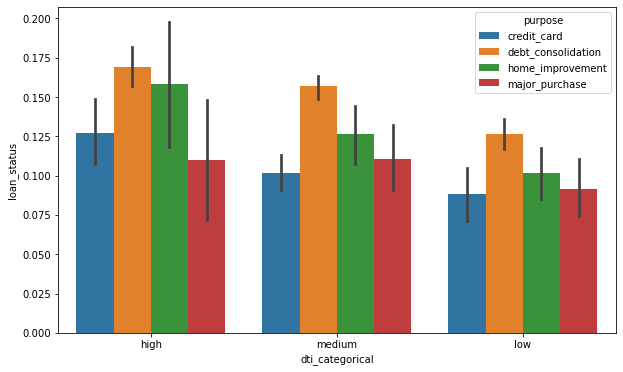

In [86]:
# debt to income ratio
plot_segmented('dti_categorical')

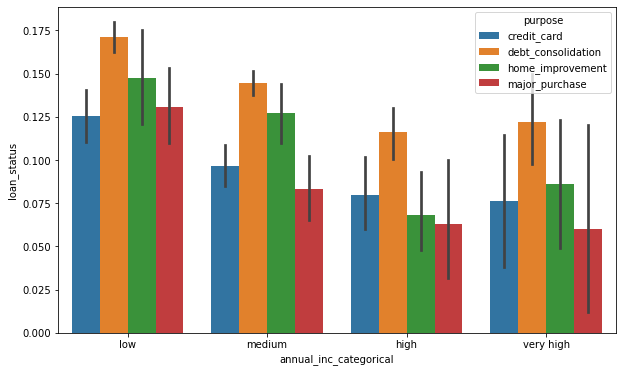

In [87]:
# annual income
plot_segmented('annual_inc_categorical')

A good way to quantify th effect of a categorical variable on default rate is to see 'how much does the default rate vary across the categories'. 

Let's see an example using annual_inc as the categorical variable.

In [88]:
# variation of default rate across annual_inc
df.groupby('annual_inc_categorical').loan_status.mean().sort_values(ascending=False)

annual_inc_categorical
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64

In [89]:
# one can write a function which takes in a categorical variable and computed the average 
# default rate across the categories
# It can also compute the 'difference between the highest and the lowest default rate' across the 
# categories, which is a decent metric indicating the effect of the varaible on default rate

def diff_rate(cat_var):
    default_rates = df.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc_categorical')
print(default_rates) 
print(diff)

annual_inc_categorical
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


Thus, there is a 6% increase in default rate as you go from high to low annual income. We can compute this difference for all the variables and roughly identify the ones that affect default rate the most.

In [90]:
# filtering all the object type variables
df_categorical = df.loc[:, df.dtypes == object]
df_categorical['loan_status'] = df['loan_status']

# Now, for each variable, we can compute the incremental diff in default rates
print([i for i in df.columns])

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies', 'month', 'year', 'loan_amnt_categorical', 'funded_amnt_inv_categorical', 'int_rate_categorical', 'dti_categorical', 'dti_bin', 'funded_amnt_categorical', 'installment_categorical', 'annual_inc_categorical', 'emp_length_categorical']


In [91]:
# storing the diff of default rates for each column in a dict
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'term': 15.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_title': 100.0, 'home_ownership': 16.0, 'verification_status': 4.0, 'purpose': 5.0, 'loan_amnt_categorical': 7.000000000000001, 'funded_amnt_inv_categorical': 6.0, 'int_rate_categorical': 19.0, 'dti_categorical': 5.0, 'funded_amnt_categorical': 5.0, 'installment_categorical': 3.0, 'annual_inc_categorical': 6.0, 'emp_length_categorical': 2.0}


# <span style="color : #c0392b">Bivariate Analysis</span>

---
#### loan_amnt over time

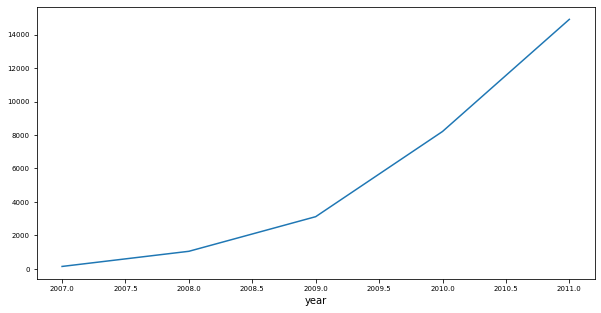

In [92]:
plt.figure(figsize=(10,5))
df.groupby('year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

---
#### Avg. loan_amnt over time

In [93]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,month,year,loan_amnt_categorical,funded_amnt_inv_categorical,int_rate_categorical,dti_categorical,dti_bin,funded_amnt_categorical,installment_categorical,annual_inc_categorical,emp_length_categorical
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,0,credit_card,27.65,0,1985-01-01,1,3,0,13648,83.7,9,2015-01-01,171.62,2016-05-01,0.0,12,2011,medium,low,medium,high,25-30,low,low,low,expert
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,0,debt_consolidation,23.51,0,2005-07-01,1,7,0,17726,85.6,11,2016-05-01,1313.76,2016-05-01,0.0,12,2011,medium,medium,high,high,20-25,medium,low,low,expert
10,1070078,1305201,6500,6500,6500.0,60 months,14.65,153.45,C,C3,Southwest Rural metro,5,OWN,72000.0,Not Verified,2011-12-01,0,debt_consolidation,16.12,0,1998-01-01,2,14,0,4032,20.6,23,2013-06-01,1655.54,2015-12-01,0.0,12,2011,medium,medium,medium,medium,15-20,medium,low,medium,senior
11,1069908,1305008,12000,12000,12000.0,36 months,12.69,402.54,B,B5,UCLA,10,OWN,75000.0,Source Verified,2011-12-01,0,debt_consolidation,10.78,0,1989-10-01,0,12,0,23336,67.1,34,2013-09-01,6315.30,2013-08-01,0.0,12,2011,medium,medium,medium,medium,10-15,medium,high,medium,expert
12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,1,RENT,30000.0,Source Verified,2011-12-01,1,debt_consolidation,10.08,0,2004-04-01,1,4,0,10452,91.7,9,2012-07-01,305.38,2012-11-01,0.0,12,2011,medium,medium,medium,medium,10-15,medium,medium,low,fresher


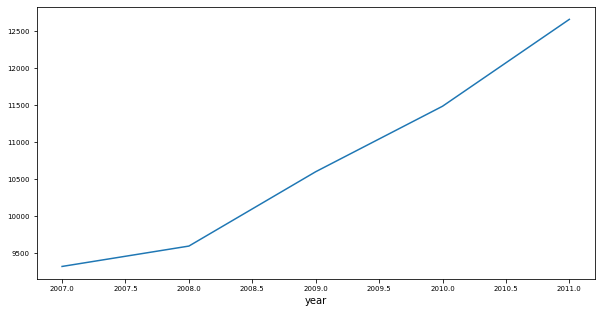

In [94]:


plt.figure(figsize=(10,5))
df.groupby('year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

**Observation:**
-  Average loan amount dropped sharply when subprime mortgage crisis hit

---
####  loan_amnt and annual_inc

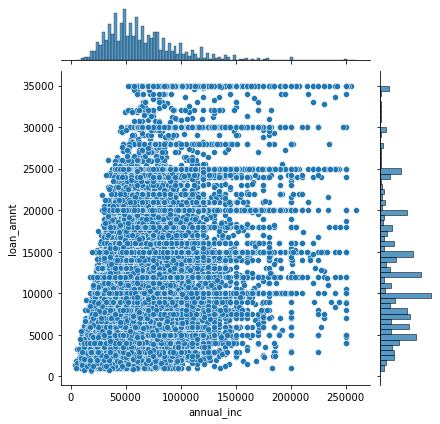

In [95]:
sns.jointplot('annual_inc', 'loan_amnt', df.loc[df['annual_inc']<260000])
plt.show()

**Observation:**
-  There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans. 

---
#### loan_amnt vs grade

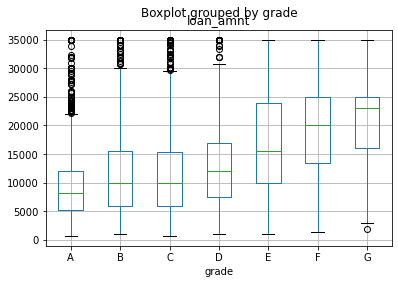

In [96]:
df.boxplot(column='loan_amnt', by='grade')
plt.show()

 -  Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

---
##### annual income with grade

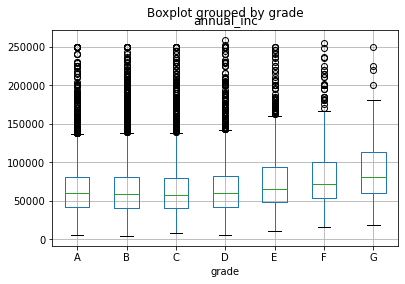

In [97]:
df.loc[df['annual_inc']<260000].boxplot(column='annual_inc', by='grade')
plt.show()

---
#### loan_amnt vs verification_status vs loan status

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

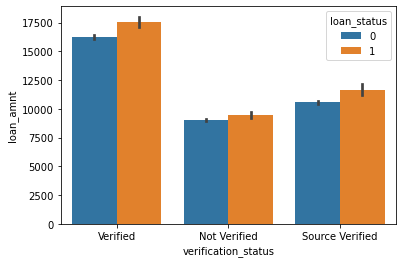

In [98]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)

- Higher loan amounts are Verified more often.  
- We already know that larger loans are less in number but see a higher charge off rate.
- This, combined with previous Observation, explains why verified loans see a higher default rate. Higher loan amounts are very risky and are also verified more often by Lending Club. 

---
#### Interest Rate and Term

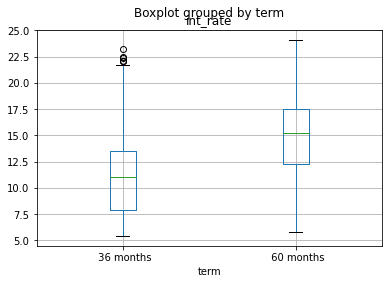

In [99]:
#master_loan.groupby('term').int_rate.mean().plot(kind='bar')
df.boxplot(column='int_rate', by='term')
plt.show()

**Observation:**
-  Intrest rates are besed on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.

---
#### Interest Rate and Sub Grade

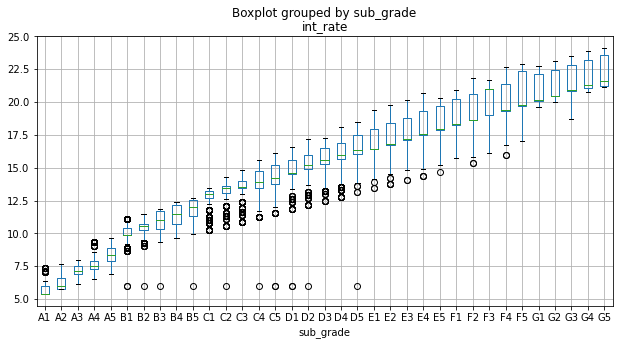

In [100]:
df.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

**Observation:**
-  Intrest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of intrest for the loan.

<AxesSubplot:title={'center':'int_rate'}, xlabel='loan_status'>

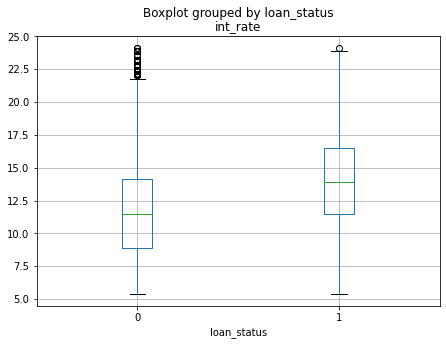

In [101]:
df.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

**Observation:**
- Loans at a higher intrest rate are more likely to be Charged Off.

#### Loan amount vs Grade vs Term

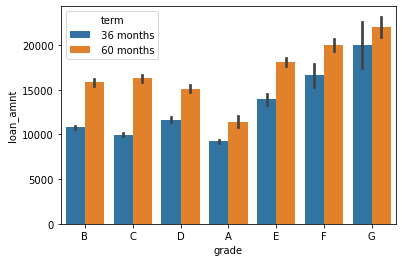

In [102]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=df, estimator=np.mean)
plt.show()

**Observation:**
-  Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with lower grade for longer terms.

#### Loan amount Vs term Vs Loan Status


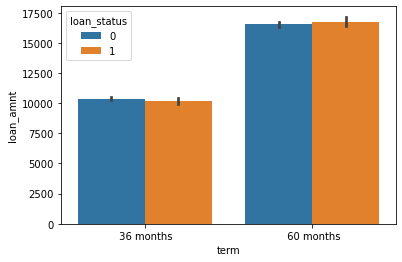

In [103]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)
plt.show()

**Observation:**
-  Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with longer terms and see higher Charge Offs.


#### revol_util Vs grade Vs Loan Status


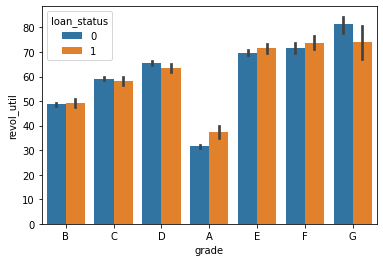

In [104]:
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=df, estimator=np.mean)
plt.show()

**Observation:**
-  revol_util and grade(and therefore int_rate) are correlated in some way. The revol_util is positivly correlated to the grade. As the grade goes from A to E the revol_util also increases. This may be because higer loan amounts are accosiated with higher grades.

#### revol_rate Vs int_rate


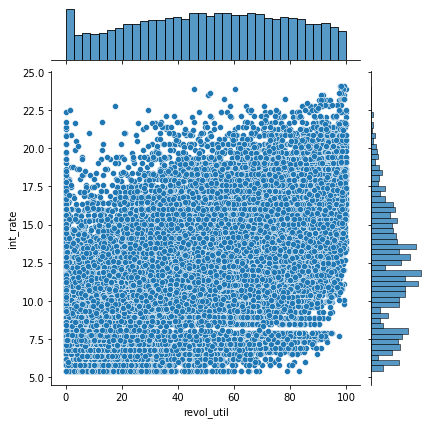

In [105]:
sns.jointplot('revol_util', 'int_rate', df)

#### revol_util vs Grade

<Figure size 1440x360 with 0 Axes>

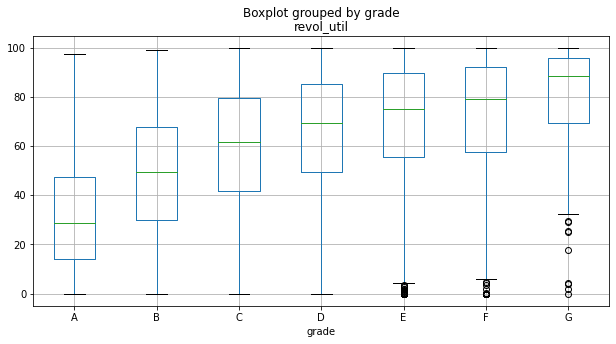

In [106]:
plt.figure(figsize=(20,5))
df.boxplot(column='revol_util', by='grade',figsize=(10,5))
plt.show()

In [107]:
corr=df.corr()
corr['loan_amnt']

id                      0.129102
member_id               0.129822
loan_amnt               1.000000
funded_amnt             0.980462
funded_amnt_inv         0.938355
int_rate                0.322156
installment             0.925433
emp_length              0.157161
annual_inc              0.245650
loan_status             0.067063
dti                     0.069839
delinq_2yrs            -0.032136
inq_last_6mths          0.004094
open_acc                0.165345
pub_rec                -0.052108
revol_bal               0.340624
revol_util              0.080719
total_acc               0.258413
last_pymnt_amnt         0.468085
pub_rec_bankruptcies   -0.037888
month                   0.056376
year                    0.120747
Name: loan_amnt, dtype: float64

<AxesSubplot:>

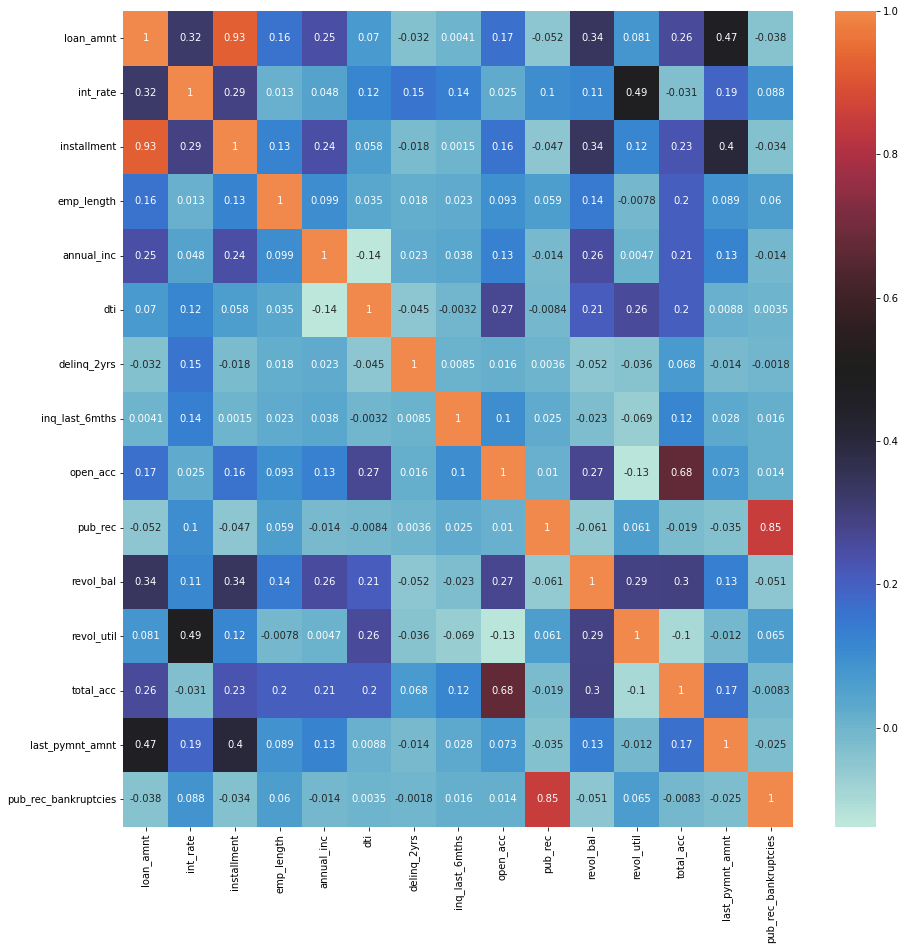

In [108]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

Observation:
- loan_amnt is correlated to last_payment_amount with r factor.44, as expected
- int_rate is correlated to revol_util with an r factor of .47 - This is good, as the company is charging higher interest from the riskier loan.
- loan_amnt revol_bal are correlated with r factor .35 - This is not good as it suggests that higher loan amount is being approved to riskier borrowers.
- delinq_2yrs is un-correlated with the public record of bankruptcy. Therefore they represent distinct features with individual predictive values. 

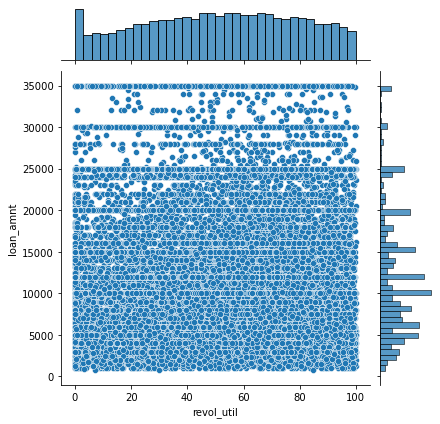

In [109]:
sns.jointplot('revol_util', 'loan_amnt', df)

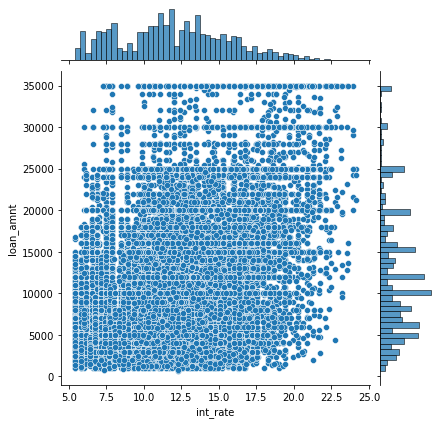

In [110]:
sns.jointplot('int_rate', 'loan_amnt', df)

####  dti vs open_acc

In [111]:
df['dti_bin']
df.groupby('dti_bin').int_rate.mean()

dti_bin
0-5      11.005328
5-10     11.579651
10-15    12.013126
15-20    12.531889
20-25    12.754017
25-30     9.697412
Name: int_rate, dtype: float64

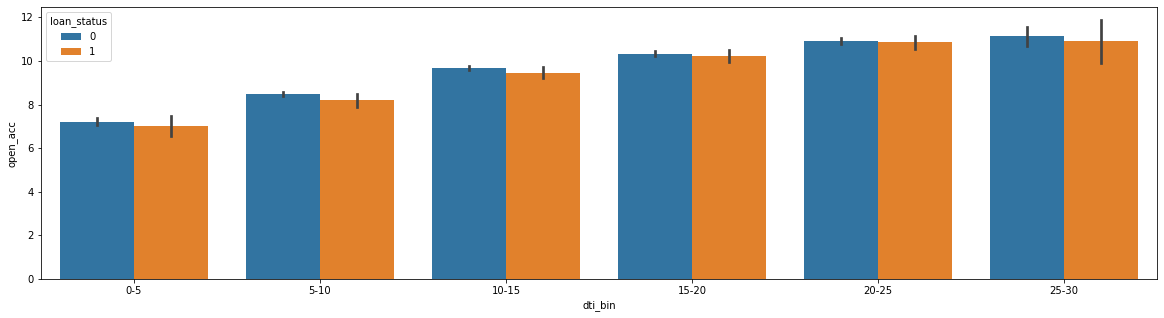

In [112]:
plt.figure(figsize=(20,5))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=df, estimator=np.mean)
plt.show()

**Observation:**
-  The dti increses with the number of open credit line in borrowers credit file.

####  delinq_2yr VS loan amount VS grade

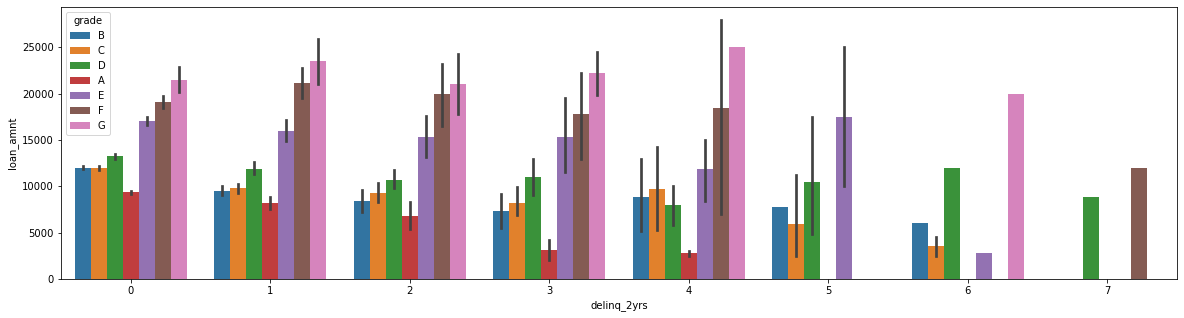

In [113]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=df, estimator=np.mean)
plt.show()

**Observation:**
-  Not many loans receive invstment with higher number of delinquencies(>3). Despite the low loan amount request, these loans are considered risky and are not invested much in.
- Lending club should further restrict their investment. We see loan amounts of >15000 on average for people having >=2 delinquencies. 

####  delinq_2yr VS int_rate  VS loan_status

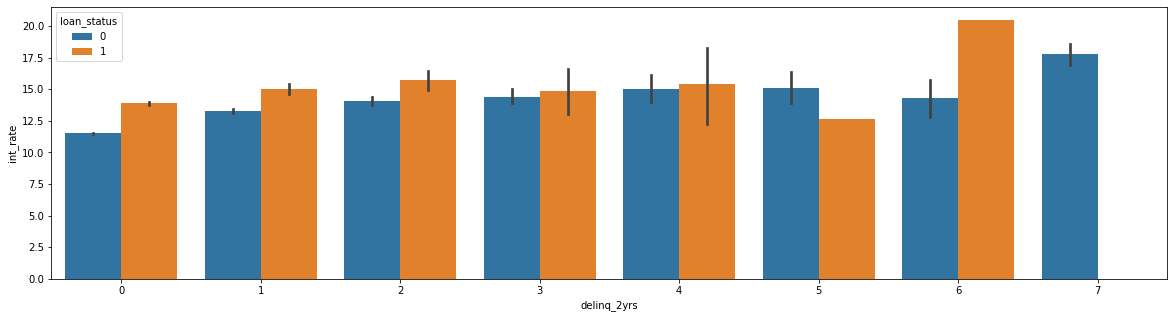

In [114]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=df, estimator=np.mean)
plt.show()

**Observation:**
- In genral, intrest rate offered inceases with the number of deliquency of the borrower.

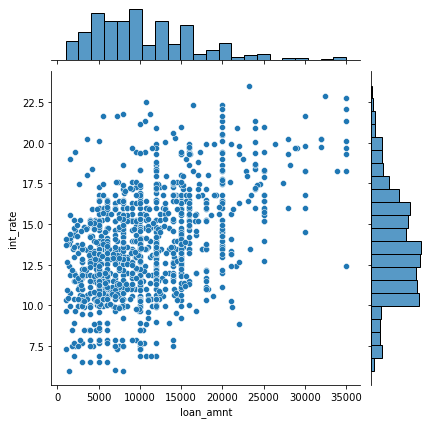

In [115]:
sns.jointplot('loan_amnt', 'int_rate', df.loc[df.pub_rec_bankruptcies > 0])

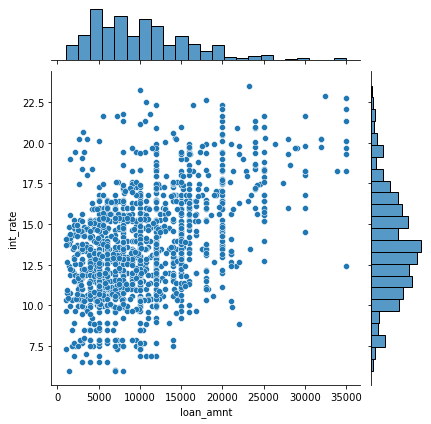

In [116]:
sns.jointplot('loan_amnt', 'int_rate', df.loc[df.pub_rec > 0])

In [117]:
df[['pub_rec', 'pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.000000,0.853019
pub_rec_bankruptcies,0.853019,1.000000


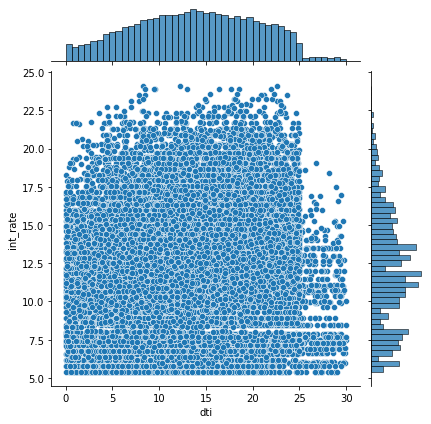

In [118]:
sns.jointplot('dti', 'int_rate', df)

# <span style="color : #c0392b">Derived Metrics</span>

--- 
#### Derived variable - ratio of loan amount to annual income 

<AxesSubplot:xlabel='ratio', ylabel='Density'>

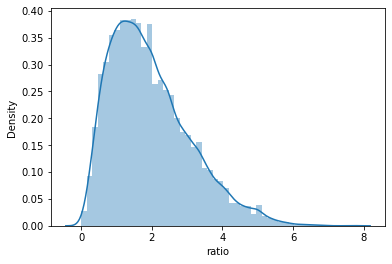

In [119]:
df['ratio'] = loan['loan_amnt'] * 10 / loan['annual_inc']
sns.distplot(df['ratio'])

# <span style="color : #c0392b">Results Summary</span>

Insights
1. Univariate Analysis of Categorical Variables
2. Default Rate increases from grade A to G.
3. Default Rate increases with sub grade rank across all grades.
4. Default Rate is high in verified loans.
5. Default Rate is max in small businesses.
6. Maximum Loan approvals happens in December.
7. 2007 & 2009 have max and min loan_status.
8. Default Rate is highest in small businesses.

Univariate Analysis of Continuous Variables
1. Default Rate is high for “very high” loan amount.
2. Default Rate is high for “very high” funded amount inv.
3. Default Rate is high for “high” interest rate.
4. Default Rate is high for “high” debt to income ratios..
5. Default Rate is high for “very high” count of installment.
6. Default Rate is high for “low” annual income.
7. Default Rate is high for “high” funded amount.
8. Default Rate is high for experienced.

Segmented Univariate Analysis
1. Default Rate is max in small businesses.
2. 4 major categories are mentioned above.
3. Count of loan disbursed is max for debt consolidation.
4. Debt consolidation is highest among employees experience of all years except 1 year.
5. Debt consolidation is still highest either in 36 or 60 months term.
6. Default Rate is highest for debt consolidation is highest among all grades.
7. Debt consolidation is highest among all home_owneship except others.
8. Debt consolidation is highest among employees experience of all years except 1 year.
9. Debt consolidation is highest among all years except 2007.
10. All 4 purpose are are high in “very high” loan amount.
11. All 4 purpose are are high in  high” interest rate..
12. Installment also has debt consolidation as the highest factor.
13. All 4 purpose are are high in “high” debt to income ratio.
14. All 4 purpose are are high in “low” annual income.

Bivariate analysis
1. Average loan amount dropped sharply when subprime mortgage crisis hit
2. There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans.
3. Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.
4. Median grows from grade A to G gradually.
5. Higher loan amounts are Verified more often.
6. We already know that larger loans are less in number, but see a higher charge off rate.
7. This, combined with previous observation, explains why verified loans see a higher rate of default. It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club.
8. Interest rates are biased on term. Larger amounts were seen to be given for higher term. The rate of interest associated with them is also high.
9. Interest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of interest for the loan.
10. Loans at a higher interest rate are more likely to be Charged Off.
11. Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with lower grade for longer terms.
12. Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with longer terms and see higher Charge Offs.
13. revol_util and grade(and therefore int_rate) are correlated in some way. The revol_util is positively correlated to the grade. As the grade goes from A to E the revol_util also increases. This may be because higher loan amounts are associated with higher grades.
14. Utilization rate for loan amount is maximum for medium interest rates.
15. Median for revol_util increases from grade A to G.
16. Utilization rate for loan amount is higher for medium loan amount.
17. loan_amnt is correlated to last_payment_amount with r factor.44, as expected
18. int_rate is correlated to revol_util with r factor of .47 - This is good, as company is charging higher interest from riskier loan.
19. loan_amnt revol_bal are correlated with r factor .35 - This is not good as it suggests that higher loan amount is being approved to riskier borrowers.
20. delinq_2yrs is totally un-correlated with public record of bankruptcy. Therefore they represent distinct features with individual predictive value.
21. Interest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of interest for the loan.
22. Fully paid has slightly more open account than charged off across dti_bin.
23. Interest Rate increases proportionally to Loan Amount for pub_rec_bankruptcies.
24. Grade E, F, G has relatively higher loan amount than A. B, C, D across delinq_2yrs.
25. Interest Rate increases proportionally to Loan Amount for pub_rec.
26. Interest Rate is higher for Charged Off than Fully Paid across delinq_2yrs except for 5.
27. Sharp drop in density of interest rate post 25 debt to interest ratio.

BELOW ARE THE DIFFERENCE OF DEFAULT RATES FOR EACH OF THE COLUMNS

In [120]:
# storing the diff of default rates for each column in a dict
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'term': 15.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_title': 100.0, 'home_ownership': 16.0, 'verification_status': 4.0, 'purpose': 5.0, 'loan_amnt_categorical': 7.000000000000001, 'funded_amnt_inv_categorical': 6.0, 'int_rate_categorical': 19.0, 'dti_categorical': 5.0, 'funded_amnt_categorical': 5.0, 'installment_categorical': 3.0, 'annual_inc_categorical': 6.0, 'emp_length_categorical': 2.0}


FOLLOWING IS THE CORRELATION FOR BANKRUPTCIES

In [121]:
df[['pub_rec', 'pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.000000,0.853019
pub_rec_bankruptcies,0.853019,1.000000


# <span style="color : #c0392b">Recommendations</span>


Highest default rate is for debt consolidation which in turn increase the overall debt exposure of individual.
Hence, suggesting to settle an amount and charge off the loan in order to not increase the amount further.
1. Loan approval can be reduced for small business purposes.
2. Loan approval can be reduced for people with prior bad record or at least stopped for high-value loans.
3. Loan approval can be reduced where amount/income is higher than 30%.
4. High Value Loan approval can be reduced when revolving line utilization rate greater than 75%.
5. Start–charging higher interest rates for loans with dti greater than 20.
    Higher interest rate will further led to increase in debt.
    Hence, highly correlated to default rates.